In [1]:
import sys
sys.path.append("..")
from model_analysis.jnk3_no_ask1 import model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Loading sampling parameter from pydream run

chain0 = np.load('../model_analysis/pydream_results_4box/jnk3_dreamzs_5chain_sampled_params_chain_0_500000.npy')
chain1 = np.load('../model_analysis/pydream_results_4box/jnk3_dreamzs_5chain_sampled_params_chain_1_500000.npy')
chain2 = np.load('../model_analysis/pydream_results_4box/jnk3_dreamzs_5chain_sampled_params_chain_2_500000.npy')
chain3 = np.load('../model_analysis/pydream_results_4box/jnk3_dreamzs_5chain_sampled_params_chain_3_500000.npy')
chain4 = np.load('../model_analysis/pydream_results_4box/jnk3_dreamzs_5chain_sampled_params_chain_4_500000.npy')

total_iterations = chain0.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain0[burnin:, :], chain1[burnin:, :], chain2[burnin:, :],
                          chain3[burnin:, :], chain4[burnin:, :]))

In [3]:
# setting up variables for plotting

idx_pars_calibrate = [1, 5, 9, 11, 15, 17, 19, 23, 25, 27, 31, 35, 36, 37, 38, 39, 41, 43] #pydream3

ndims = len(idx_pars_calibrate)
colors = sns.color_palette(n_colors=ndims)
rows = 6
columns = 3
counter = 0

/Users/dionisio/anaconda/envs/jarm/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/dionisio/anaconda/envs/jarm/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/dionisio/anaconda/envs/jarm/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/dionisio/anaconda/envs/jarm/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:10

Text(0,0.5,'Probability')

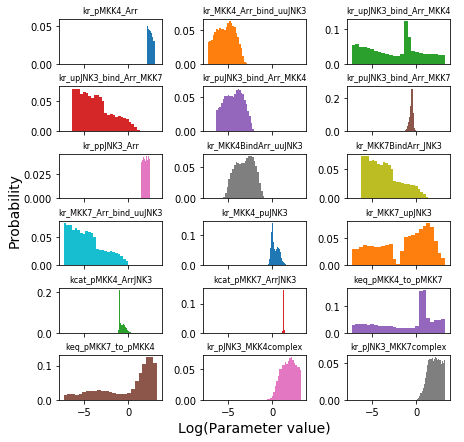

In [4]:
# plotting results

f, axes = plt.subplots(rows, columns, figsize=(7, 7), sharex=True)
for r in range(rows):
    for c in range(columns):
        weights = np.ones_like(samples[:, counter])/float(len(samples[:, counter]))
        axes[r, c].hist(samples[:, counter], bins=25, color=colors[counter], weights=weights)
        axes[r, c].set_title(model.parameters[idx_pars_calibrate[counter]].name, fontdict={'fontsize':8})
        # axes[r, c].set_xlim(-6, 6)
        counter += 1

        if counter > len(idx_pars_calibrate):
            break
f.add_subplot(111, frameon=False)
f.subplots_adjust(wspace=0.4)
f.subplots_adjust(hspace=0.5)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Log(Parameter value)", fontsize=14)
plt.ylabel("Probability", fontsize=14, labelpad=15)